In [46]:
import numpy as np
from tqdm import tqdm, trange
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST
import matplotlib.pyplot as plt
from patchify import patchify


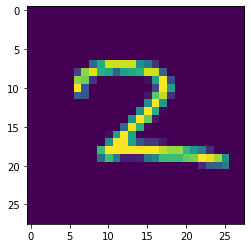

In [90]:
transform = ToTensor()

train_set = MNIST(root='./../datasets', train=True, download=True, transform=transform)
test_set = MNIST(root='./../datasets', train=False, download=False, transform=transform)

train_loader = DataLoader(train_set, shuffle=True, batch_size=128)
test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

for batch in train_loader:
    images, targets = batch 

plt.imshow(images[0].squeeze())      #1x28x28--> 28x28


In [115]:
images=images.squeeze()
print(images.shape)
print(type(images))

patches = np.zeros((96,49,16))
n_patch=0
for idx,image in enumerate(images):
    patching = patchify(image, (4,4), step=4) # split image into 7x7 small 4x4 patches.
    for i in range(patching.shape[0]):
        for j in range (patching.shape[1]):
            single_patch=patching[i,j,:,:]
            patches[idx,n_patch,:]=single_patch.flatten()
            n_patch=n_patch+1
            if n_patch==49:
                n_patch=0

print(patches[23,44:49,:])

(96, 28, 28)
<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
